# Solar Power Generation Prediction Model

##### Devi Krishna U 
##### Entri Elevate DSML-16
##### 25-09-2024

1. **Overview of Problem Statement:**
    In this data set it consist of several columns that are much related to the daily power genaration using solar energy around us.Different weather conditions ,latitude ,longitude and several other factors like palpitation,wind,temprature etc also affects the powe geeration directly or indirectly.By analysing this data ,we have to find the most related features on this solar power energy generation and also to predict the solar power generation accordingly.
   

2. **Objective:**
    To predict the solar power generation through machine learning techniques.

3. **Data Description:**
    This data is from Data world.The link to the data set is https://data.world/gymprathap/solar-energy-power-generation-dataset/discuss/solar-energy-power-generation-dataset .This data consist of 21 festures and 4312 rows.As there is more relation between the features ,there can be an issue with the correlation of features and also multicollinearity.so feature selection has to be done accordingly.There is no categorical columns in the dataset.

4. **Data Collection:**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv("Solar power generations.csv")
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [3]:
data.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [4]:
#finding unique values in the dataset
unique_value = []

for i in data.columns:
    current_column = data[i].value_counts().count()
    unique_value.append(current_column)
    
pd.DataFrame(unique_value, index = data.columns, columns = ["Total Unique Values"])

,Total Unique Values
temperature_2_m_above_gnd,2413
relative_humidity_2_m_above_gnd,94
mean_sea_level_pressure_MSL,376
total_precipitation_sfc,23
snowfall_amount_sfc,11
total_cloud_cover_sfc,160
high_cloud_cover_high_cld_lay,97
medium_cloud_cover_mid_cld_lay,98
low_cloud_cover_low_cld_lay,99
shortwave_radiation_backwards_sfc,1015


5. **Data Preprocessing - Data Cleaning:**
   Here we can find the missing value datas and we can eliminate it and also we can find the outliers through intra quartile method and remove     unnecessary datas to clean up the data for the analysis.

In [5]:
#remove null values or missing data
missing_data = data.isnull().sum()
missing_data

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [6]:
#finding duplicated rows
duplicated_data = data.duplicated().sum()
duplicated_data

0

In [7]:
# finding Outliers using interquartile method 

q1 =data['generated_power_kw'].quantile(0.25)
q3 = data['generated_power_kw'].quantile(0.75)
iqr = q3-q1
print (q1)
print(q3)
print (iqr)

231.70045
2020.9667
1789.26625


In [8]:
upper_limit =q3 + 1.5*iqr
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

4704.866075
-2452.198925


In [9]:
#find the outliers
data.loc[(data['generated_power_kw'] > upper_limit) | (data['generated_power_kw'] < lower_limit)]

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw


The data was clean and there wer no null ,duplicated values and also outliers ,So checking for skewness and kurtosis to check the distribution of data.No encoding is necessory as there is no categorical data in the dataset.

***Find Skewness and Kurtosis***

In [10]:
# Calculate skewness for each numerical column
skewness = data.select_dtypes(include=[np.number]).skew()
print("Skewness:\n", skewness)

Skewness:
 temperature_2_m_above_gnd             0.145986
relative_humidity_2_m_above_gnd       0.296871
mean_sea_level_pressure_MSL           0.517280
total_precipitation_sfc               8.630336
snowfall_amount_sfc                  26.278299
total_cloud_cover_sfc                 0.739499
high_cloud_cover_high_cld_lay         2.143289
medium_cloud_cover_mid_cld_lay        1.537975
low_cloud_cover_low_cld_lay           1.449282
shortwave_radiation_backwards_sfc     0.172694
wind_speed_10_m_above_gnd             1.017751
wind_direction_10_m_above_gnd        -0.300773
wind_speed_80_m_above_gnd             0.931519
wind_direction_80_m_above_gnd        -0.240414
wind_speed_900_mb                     0.990214
wind_direction_900_mb                -0.265769
wind_gust_10_m_above_gnd              1.111227
angle_of_incidence                    0.480446
zenith                               -0.111279
azimuth                               0.081150
generated_power_kw                    0.324025
dt

In [11]:
from scipy.stats import skew, kurtosis

# Calculate kurtosis for each numerical column
kurtosis = data.select_dtypes(include=[np.number]).apply(lambda x: kurtosis(x, fisher=False))
print("kurtosis:\n", kurtosis)

kurtosis:
 temperature_2_m_above_gnd              2.288673
relative_humidity_2_m_above_gnd        1.973883
mean_sea_level_pressure_MSL            3.190278
total_precipitation_sfc               97.065736
snowfall_amount_sfc                  975.143850
total_cloud_cover_sfc                  1.702003
high_cloud_cover_high_cld_lay          6.048285
medium_cloud_cover_mid_cld_lay         3.592391
low_cloud_cover_low_cld_lay            3.251062
shortwave_radiation_backwards_sfc      1.945597
wind_speed_10_m_above_gnd              4.138488
wind_direction_10_m_above_gnd          2.083639
wind_speed_80_m_above_gnd              3.568244
wind_direction_80_m_above_gnd          1.949033
wind_speed_900_mb                      4.049933
wind_direction_900_mb                  2.062324
wind_gust_10_m_above_gnd               4.411064
angle_of_incidence                     2.435792
zenith                                 2.485322
azimuth                                1.790544
generated_power_kw           

Variables with significant skewness and high kurtosis like total_precipitation_sfc and snowfall_amount_sfc have extreme outliers, likely necessitating transformations (e.g., log transformation) to make them more suitable for predictive modeling.

6. **Exploratory Data Analysis (EDA):**

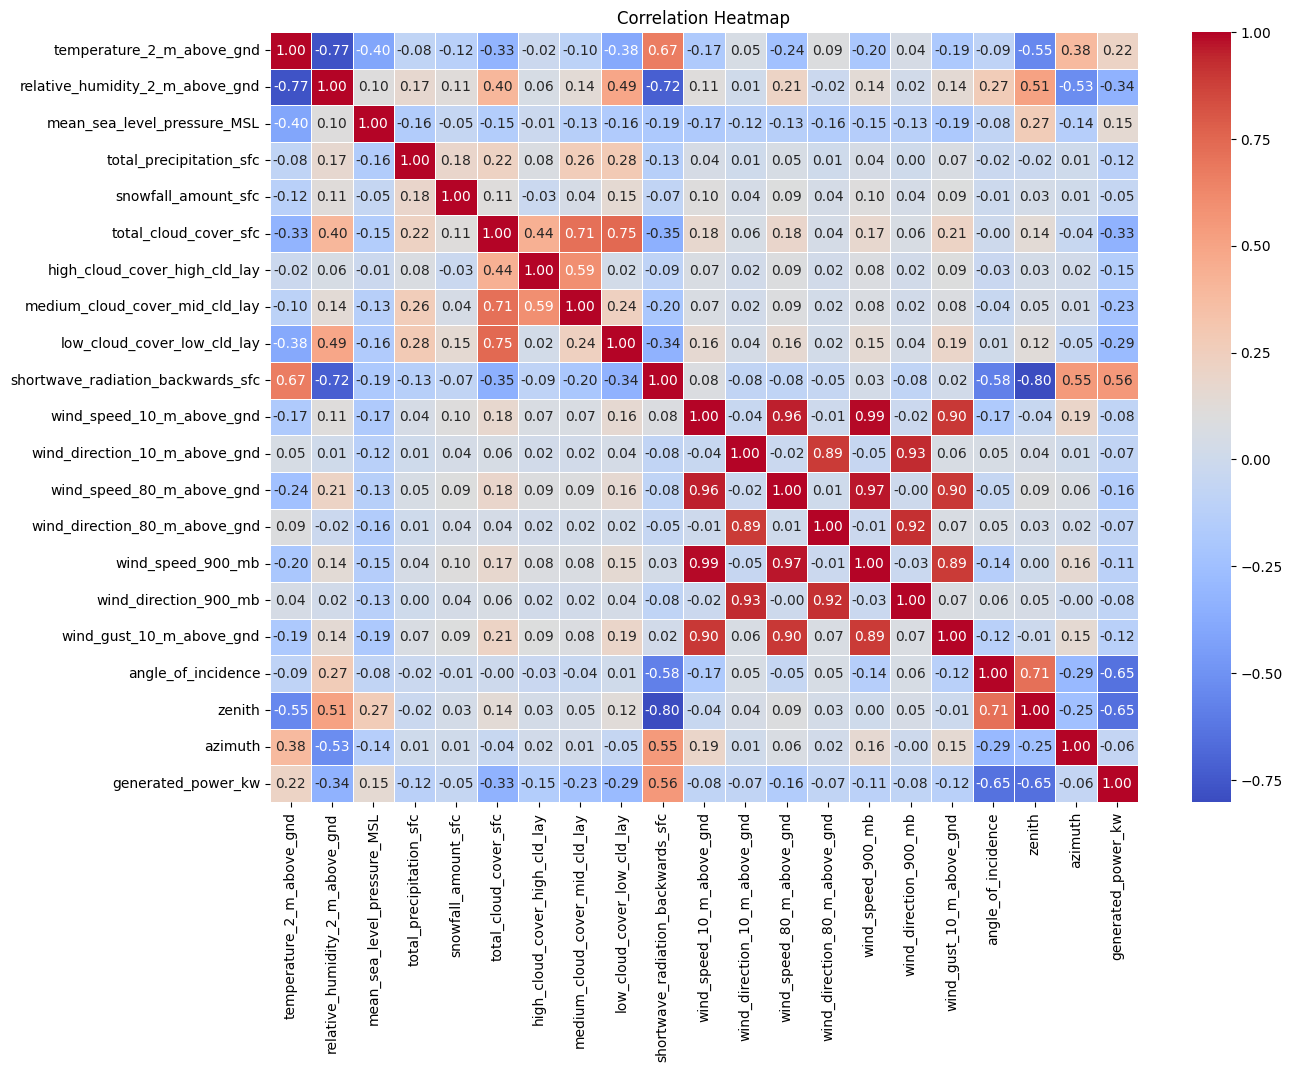

In [12]:
# Correlation matrix to understand relationships between features and target
correlation_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


'generated_power_kw' is strongly correlated with features like angle of incidence, Zenith,Short wave radiaton which makes sense as they directly relate to solar power generation.There are several features that can affect the power generation and shows multiple correlations in the heat map.

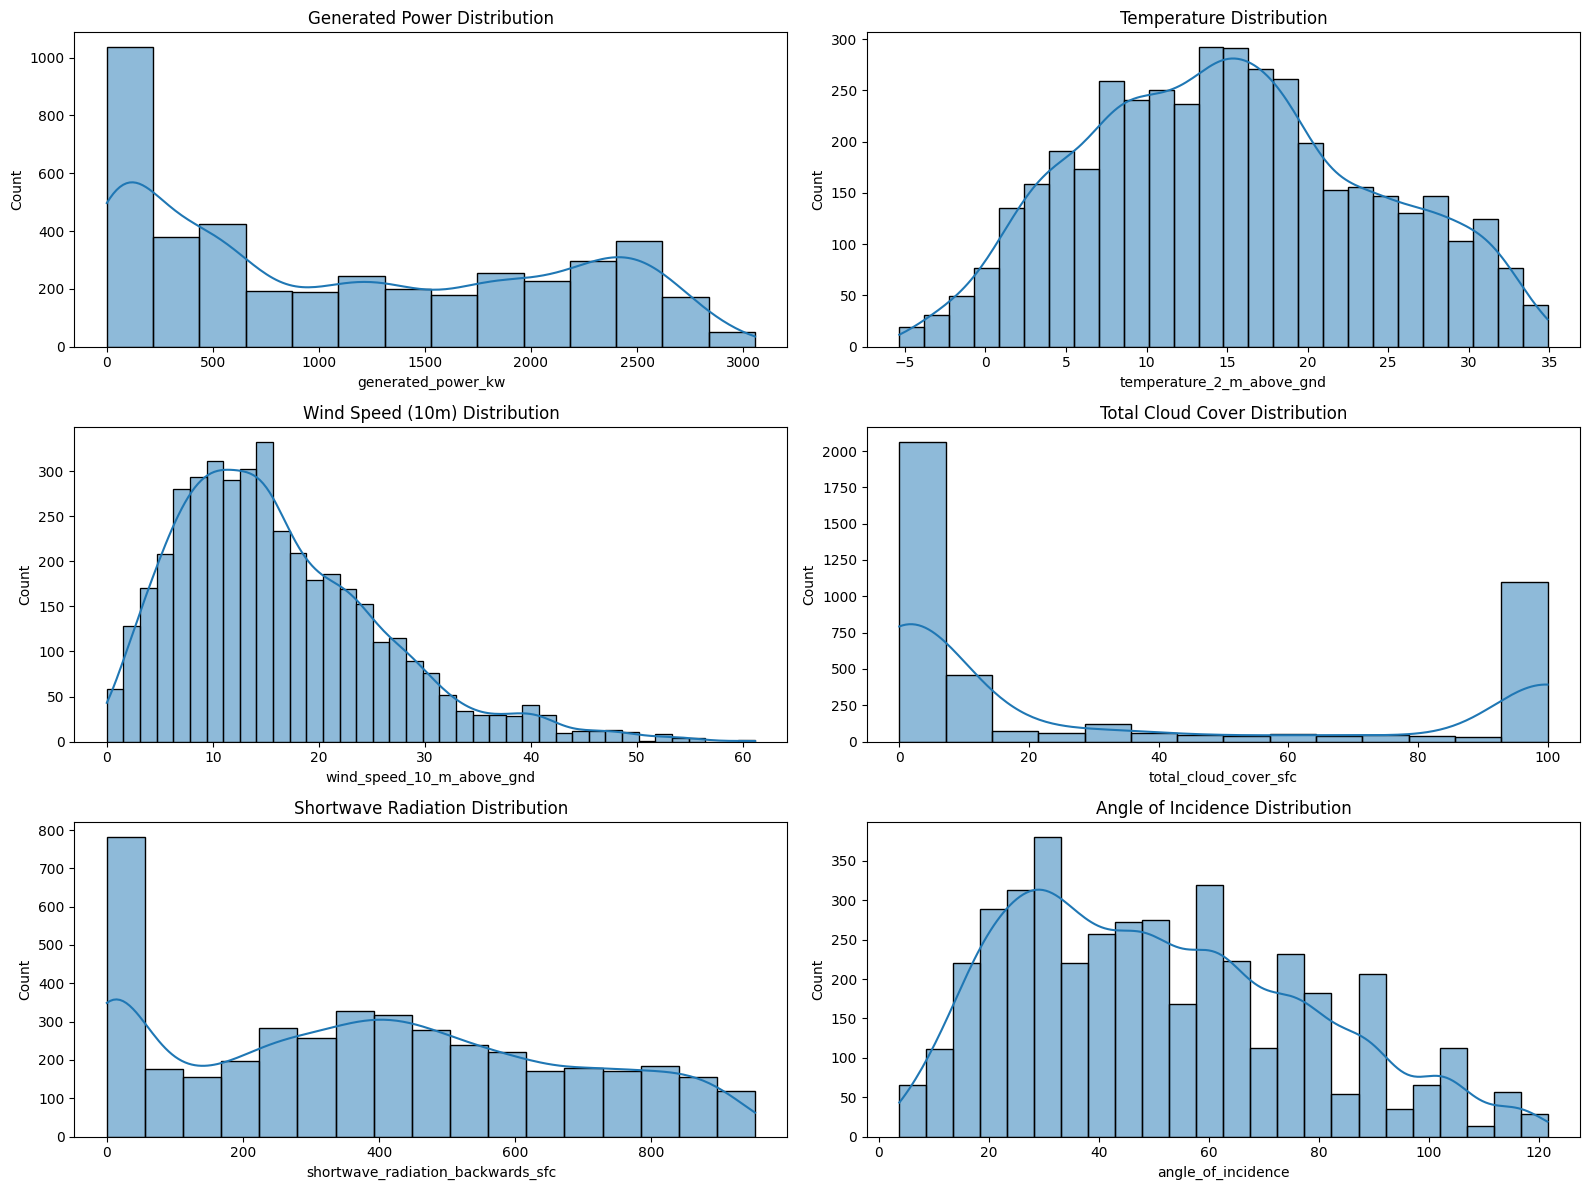

In [13]:
# Distribution plots for target variable and important features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Target variable distribution
sns.histplot(data['generated_power_kw'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Generated Power Distribution')

# Temperature distribution
sns.histplot(data['temperature_2_m_above_gnd'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Temperature Distribution')

# Wind speed at 10m distribution
sns.histplot(data['wind_speed_10_m_above_gnd'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed (10m) Distribution')

# Cloud cover distribution
sns.histplot(data['total_cloud_cover_sfc'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total Cloud Cover Distribution')

# Shortwave radiation distribution
sns.histplot(data['shortwave_radiation_backwards_sfc'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Shortwave Radiation Distribution')

# Angle of incidence distribution
sns.histplot(data['angle_of_incidence'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Angle of Incidence Distribution')

plt.tight_layout()
plt.show()

### Feature Engineering and Feature Selection

### Lasso feature selection and Linear regression 

In [14]:
# Separate features (X) and target (y)
X = data.drop(['generated_power_kw'], axis=1)
y = data['generated_power_kw']

In [15]:
#Lasso regression can be used for feature selection by forcing less important features’ coefficients to zero
from sklearn.linear_model import LassoCV

# Fit Lasso model with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

# Get coefficients and filter out zero coefficients
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features_lasso = coef[coef != 0].index
print("Selected Features by Lasso: ", selected_features_lasso)

Selected Features by Lasso:  Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_direction_10_m_above_gnd', 'wind_speed_80_m_above_gnd',
       'wind_direction_80_m_above_gnd', 'wind_speed_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth'],
      dtype='object')


In [16]:
X_selected = X[list(selected_features_lasso)]
X_selected

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
0,2.17,31,1035.0,0.0,0,0,0,0.00,312.71,9.36,22.62,6.62,24.48,58.753108,83.237322,128.33543
1,2.31,27,1035.1,0.0,0,0,0,1.78,294.78,5.99,32.74,4.61,21.96,45.408585,75.143041,139.65530
2,3.65,33,1035.4,0.0,0,0,0,108.58,270.00,3.89,56.31,3.76,14.04,32.848282,68.820648,152.53769
3,5.82,30,1035.4,0.0,0,0,0,258.10,323.13,3.55,23.96,3.08,19.80,22.699288,64.883536,166.90159
4,7.73,27,1034.4,0.0,0,0,0,375.58,10.01,6.76,25.20,6.62,16.56,19.199908,63.795208,182.13526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,100.0,100,100,100,257.21,285.42,25.50,283.06,24.01,25.20,22.700907,64.952098,167.06794
4209,7.57,90,1026.1,100.0,79,100,100,210.04,6.91,13.00,4.76,11.61,10.44,19.307487,63.895118,182.28247
4210,7.27,90,1026.3,100.0,73,100,100,113.92,2.29,8.71,352.87,7.95,22.32,25.249506,65.827032,197.33868
4211,8.25,81,1025.5,100.0,74,66,100,186.90,11.31,6.29,13.24,5.94,15.48,36.361161,70.496313,211.30027


### Data Splitting

In [17]:
# Assigns the selected columns(X_new_df) to the X variable
X = X_selected
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3370, 16), (843, 16), (3370,), (843,))

X_train.shape: '(3370, 16)' ● 3370: Number of training samples. ● 16: Number of selected features in the training set after feature selection.

X_test.shape: '(843, 16)' ● 843: Number of testing samples. ● 16: Number of selected features in the testing set after feature selection.

y_train.shape: '(3370,)' ● 3370: Number of target labels for the training samples.

y_test.shape: '(843,)' ● 843: Number of target labels for the testing samples.

In [18]:
# # refined selected features using kbest from the lasso 
# X_train_refined, X_test_refined, y_train, y_test = train_test_split(X_selected_Kbest, y, test_size=0.3, random_state=42)

### Model Training and Evaluation 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Model 1 : Linear Regression

# Building a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(256427.1164200755, 0.7192804731667827)

### KBest feature selection and Random Forest, Gradient boost model, XGBoost

In [20]:
# Separate features (X) and target (y)
X = data.drop(['generated_power_kw'], axis=1)
y = data['generated_power_kw']

### Feature Selection using Kbest

In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Refined feature selection using SelectKBest to pick the top features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected_kbest = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features_refined = [X.columns[i] for i in selected_feature_indices]
selected_features_refined

['temperature_2_m_above_gnd',
 'relative_humidity_2_m_above_gnd',
 'mean_sea_level_pressure_MSL',
 'total_cloud_cover_sfc',
 'medium_cloud_cover_mid_cld_lay',
 'low_cloud_cover_low_cld_lay',
 'shortwave_radiation_backwards_sfc',
 'wind_speed_80_m_above_gnd',
 'angle_of_incidence',
 'zenith']

### Data Splitting

In [22]:
# Splitting the dataset again with refined features
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_selected_kbest, y, test_size=0.3, random_state=42)

### Model Training and Evaluation

In [23]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_refined, y_train_refined)
y_pred_rf = rf_model.predict(X_test_refined)

# Model 3: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_refined, y_train_refined)
y_pred_gb = gb_model.predict(X_test_refined)

# Evaluating both models
mse_rf = mean_squared_error(y_test_refined, y_pred_rf)
r2_rf = r2_score(y_test_refined, y_pred_rf)

mse_gb = mean_squared_error(y_test_refined, y_pred_gb)
r2_gb = r2_score(y_test_refined, y_pred_gb)

mse_rf, r2_rf, mse_gb, r2_gb

(205347.09040806003, 0.766494558340533, 232064.79289631205, 0.7361131737918253)

In [24]:
# model 4 : XG Boost
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xg_model.fit(X_train_refined, y_train_refined)
y_pred_xg = xg_model.predict(X_test_refined)

mse_xg = mean_squared_error(y_test_refined, y_pred_xg)
r2_xg = r2_score(y_test_refined, y_pred_xg)

In [26]:
mse_xg ,r2_xg

(200624.13143266446, 0.771865156089436)

 **with skew and kurtosis ,applied these models and got accuracy upto 77.18 percent ,Now transforming my data to reduce skewness and kurtosis and build the model for better performances.**

### After Transformation

In [27]:
transform_features = ['total_precipitation_sfc','snowfall_amount_sfc','high_cloud_cover_high_cld_lay','wind_speed_10_m_above_gnd','wind_speed_900_mb','wind_gust_10_m_above_gnd']            
features_to_transform = data[transform_features]

# used power transformation

# Function to apply transformations based on skewness
def transform_feature_based_on_skewness(feature):
    skewness = feature.skew()
    kurtosis = feature.kurt()
    
    # Apply log transformation if feature is positively skewed
    if skewness > 0.5:
        return np.log1p(feature)  # log(1 + x) to avoid log(0)
    
    # Apply square root transformation if moderately skewed
    elif skewness > 0.1:
        return np.sqrt(feature)
    
    # Apply Yeo-Johnson transformation for both negative and positive skewness
    else:
        pt = PowerTransformer(method='yeo-johnson')
        return pt.fit_transform(feature.values.reshape(-1, 1))

# Apply transformation to all selected features
transformed_features = pd.DataFrame()

for feature_name in transform_features:
    transformed_features[feature_name] = transform_feature_based_on_skewness(data[feature_name])

# The transformed dataframe
print(transformed_features.head())


   total_precipitation_sfc  snowfall_amount_sfc  \
0                      0.0                  0.0   
1                      0.0                  0.0   
2                      0.0                  0.0   
3                      0.0                  0.0   
4                      0.0                  0.0   

   high_cloud_cover_high_cld_lay  wind_speed_10_m_above_gnd  \
0                            0.0                   1.997418   
1                            0.0                   1.816452   
2                            0.0                   1.736951   
3                            0.0                   1.526056   
4                            0.0                   1.975469   

   wind_speed_900_mb  wind_gust_10_m_above_gnd  
0           2.030776                  3.237894  
1           1.724551                  3.133754  
2           1.560248                  2.710713  
3           1.406097                  3.034953  
4           2.030776                  2.865624  


In [28]:
data_dropped = data.drop(columns=transform_features)
df_new = pd.concat([data_dropped, transformed_features], axis=1)
df_new.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_cloud_cover_sfc,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,...,angle_of_incidence,zenith,azimuth,generated_power_kw,total_precipitation_sfc,snowfall_amount_sfc,high_cloud_cover_high_cld_lay,wind_speed_10_m_above_gnd,wind_speed_900_mb,wind_gust_10_m_above_gnd
0,2.17,31,1035.0,0.0,0,0,0.00,312.71,9.36,22.62,...,58.753108,83.237322,128.33543,454.10095,0.0,0.0,0.0,1.997418,2.030776,3.237894
1,2.31,27,1035.1,0.0,0,0,1.78,294.78,5.99,32.74,...,45.408585,75.143041,139.65530,1411.99940,0.0,0.0,0.0,1.816452,1.724551,3.133754
2,3.65,33,1035.4,0.0,0,0,108.58,270.00,3.89,56.31,...,32.848282,68.820648,152.53769,2214.84930,0.0,0.0,0.0,1.736951,1.560248,2.710713
3,5.82,30,1035.4,0.0,0,0,258.10,323.13,3.55,23.96,...,22.699288,64.883536,166.90159,2527.60920,0.0,0.0,0.0,1.526056,1.406097,3.034953
4,7.73,27,1034.4,0.0,0,0,375.58,10.01,6.76,25.20,...,19.199908,63.795208,182.13526,2640.20340,0.0,0.0,0.0,1.975469,2.030776,2.865624


In [29]:
# Separate features (X) and target (y)
X = df_new.drop(['generated_power_kw'], axis=1)
y = df_new['generated_power_kw']

### Feature Selection

In [30]:
#applying Random Forest to rank features
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model to get feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances and sort them
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)[:10]
feature_importances

,Feature,Importance
11,angle_of_incidence,0.380129
3,total_cloud_cover_sfc,0.136716
12,zenith,0.129141
13,azimuth,0.100597
6,shortwave_radiation_backwards_sfc,0.072568
1,relative_humidity_2_m_above_gnd,0.029784
2,mean_sea_level_pressure_MSL,0.027403
19,wind_gust_10_m_above_gnd,0.022017
0,temperature_2_m_above_gnd,0.019295
5,low_cloud_cover_low_cld_lay,0.011176


### Data Splitting

In [31]:
X_selected = X[list(feature_importances['Feature'])]

# Assigns the selected columns(X_new_df) to the X variable
X = X_selected
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3370, 10), (843, 10), (3370,), (843,))

### Model Training and Evaluation

In [33]:
# model 1: Random forest regressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 176021.07440666106
R² Score: 0.8073037149504678


#### mse is quiet high but R2 score is much better than other models as the variance is 80.73 percent

In [35]:
# model 2: MLP Regressor

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2}")

Mean Squared Error: 204997.2061
R² Score: 0.7755825534614246


### HyperParameter Tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for tuning hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,  # For seeing progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Best parameters from the search
print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [37]:
# Evaluate the best model on the test data
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate metrics
mse_tuned = mean_squared_error(y_test, y_pred)
r2_tuned = r2_score(y_test, y_pred)

print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned R² Score: {r2_tuned}")

Tuned Mean Squared Error: 169608.1204696116
Tuned R² Score: 0.814324194765335


#### After Hyper Parameter Tuning we got a variance measures 81.43 percent ,which shows a good prediction model 

## Conclusion

** Here was my attempt to buld a model that have better accuracy in predicting solar power generation with the given features from the dataset.By feature selection using different methods such as Lasso regressor,KBest selection,Random forest regressor helps to eliminate the most unwanted features from the data set and helps to create these models.But as some of the datas were highly skewed and had kurtosis greater or much higher value needs the data to be transformed.So had to power transform the data and created a new dataset with the transformed values with other values.Finally Hypertuned the model to get a variance of 81.43 percent.As of now with my limited knowledge I am satisfied with result ,but can be finetuned to get a better result with other approaches. **